In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_percents = [10, 40, 70, 100]

total_data = []
for dp in data_percents:
    filename = f"./{dp}_archive/metric_average.txt"
    file = open(filename, "r")
    data_lines = file.readlines()
    
    data = {"name":f"{dp}%"}
    
    for line in data_lines:
        tokens = line.split(',')
        
        for token in tokens:
            key, value = token.split(':')
            key = key.strip()
            
            try:
                data[key].append(float(value))
            except KeyError:
                data[key] = []
                data[key].append(float(value))
            
    total_data.append(data)

In [3]:
def plot_metric(total_data, metric_name):
    
    plt.figure(figsize=(9,7))
    
    for data in total_data:
        plt.plot(data['iter'], data[metric_name], 'o--', label=data['name'])
    plt.grid()
    plt.xlabel('# of Training Iterations')




['name', '-- psnr_avg', 'ssim_avg', 'c_gt_avg', 'c_pred_avg', 'iter']


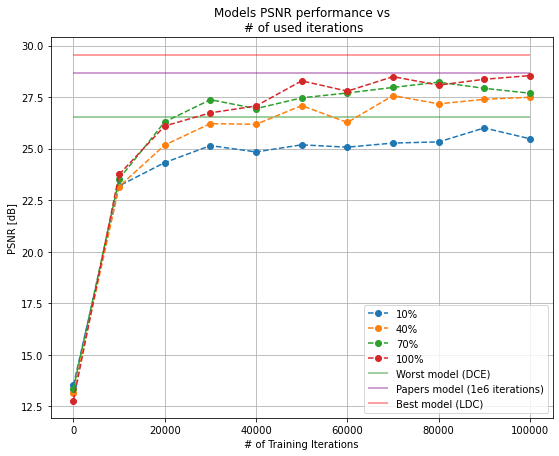

In [12]:
keys = list(total_data[0].keys())
print(keys)

plot_metric(total_data, keys[1])
plt.hlines(26.53,0,1e5, color="green",alpha=0.5, label="Worst model (DCE)")
plt.hlines(28.66,0,1e5, color="purple",alpha=0.5, label="Papers model (1e6 iterations)")
plt.hlines(29.56,0,1e5, color="red",alpha=0.5, label="Best model (LDC)")
plt.title("Models PSNR performance vs\n # of used iterations")
plt.ylabel("PSNR [dB]")
plt.legend(loc="lower right")
plt.savefig("psnr_plot.png", dpi=450)
plt.show()



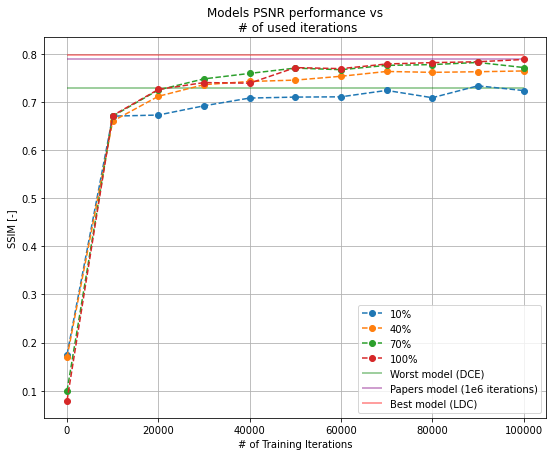

In [13]:
plot_metric(total_data, keys[2])
plt.hlines(0.73,0,1e5, color="green",alpha=0.5, label="Worst model (DCE)")
plt.hlines(0.79,0,1e5, color="purple",alpha=0.5, label="Papers model (1e6 iterations)")
plt.hlines(0.799,0,1e5, color="red",alpha=0.5, label="Best model (LDC)")
plt.title("Models PSNR performance vs\n # of used iterations")
plt.ylabel("SSIM [-]")
plt.legend(loc="lower right")
plt.savefig("ssim_plot.png", dpi=450)
plt.show()